# IMPORT NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### WHY I SELECTED LINEAR REGRESSION AND RANDOM FORESTS MODEL FOR THIS PROJECT?

Random Forest and Linear Regression were chosen for this problem based on their respective strengths and the characteristics of the dataset:


---


Linear Regression (LR):

1. Interpretability: Linear Regression provides a straightforward interpretation of the relationship between the features (year in this case) and the target variables. It assumes a linear relationship, which makes it easy to explain how changes in the input feature(s) impact the output.
2. Simplicity: LR is a simple and computationally efficient algorithm. It serves as a good baseline model for regression problems.
3. Assumption of Linearity: LR assumes that the relationship between the input feature and the output is linear. In this case, it's reasonable to assume that certain food consumption trends (e.g., fruits and vegetables) might have a linear relationship with time (year).


---

Random Forest (RF):

1. Non-Linearity: Random Forest, being an ensemble of decision trees, is capable of capturing complex non-linear relationships between features and target variables. This flexibility can be crucial when dealing with datasets where the underlying patterns are not strictly linear.
2. Handling Multiple Features: RF can handle multiple features simultaneously, making it suitable for multivariate regression problems where several factors (e.g., different types of grains) might collectively influence food consumption.
3. Robustness: RF is robust to outliers and noisy data, which can be common in real-world datasets. It can handle missing values and doesn't require as strict adherence to the assumptions of normality and linearity as Linear Regression.

# READING ALL OF THE EXCEL SHEETS

In [ ]:
sheet_names = ['AllDairy', 'Eggs','sugar and sweeteners','Red meat, poultry, and fish','Grains','Fruits and vegetables']

In [ ]:
dfs = []

In [ ]:
for i in sheet_names:
  dfs.append(pd.read_excel("/content/datasets.xlsx", sheet_name=i))

In [ ]:
dairy_df = dfs[0]
eggs_df = dfs[1]
sugar_df = dfs[2]
meat_df = dfs[3]
grains_df = dfs[4]
fruits_df = dfs[5]

# WORKING ON DAIRY EXCEL SHEET

## 1. INITIAL ANALYSIS

In [ ]:
dairy_df.tail()

,Year,"U.S. population, July 12",Food availability
108,2017,325.206030,643.201525
109,2018,326.923976,644.202346
110,2019,328.475998,651.387954
111,2020,330.113980,653.565670
112,2021,332.140523,661.323149


In [ ]:
dairy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      113 non-null    int64  
 1   U.S. population, July 12  113 non-null    float64
 2   Food availability         113 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB



The statistical summary provided for the "dairy_df" dataset encompasses three variables: "Year," "U.S. population, July 12," and "Food availability."

1. Year: The dataset spans from 1909 to 2021, covering a 113-year period. The years are uniformly distributed, with an average year of 1965. This balanced distribution suggests that the data provides a comprehensive view of this time span.

2. U.S. Population, July 12: This variable represents the U.S. population in millions as of July 12 for each year in the dataset. The population displays a gradual increase, with an approximate mean of 198.61 million. The standard deviation of about 74.38 million indicates some variability in population figures around this mean value.

3. Food Availability: This variable quantifies food availability and likely reflects consumption trends. The mean food availability is approximately 671.26, with a standard deviation of about 96.89. The data ranges from a minimum of 534.99 to a maximum of 850.66, implying variations in food availability across the years.

In [ ]:
dairy_df.describe()

,Year,"U.S. population, July 12",Food availability
count,113.00000,113.000000,113.000000
mean,1965.00000,198.612296,671.263204
std,32.76431,74.380637,96.891108
min,1909.00000,90.490000,534.986486
25%,1937.00000,128.961000,582.517417
50%,1965.00000,194.303000,645.649487
75%,1993.00000,260.255000,763.000000
max,2021.00000,332.140523,850.659944


In [ ]:
dairy_df.shape

(113, 3)

In [ ]:
dairy_df.isnull().sum()

Year                        0
U.S. population, July 12    0
Food availability           0
dtype: int64

## 2. EXPLORATORY DATA ANALYSIS

In [ ]:
dairy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      113 non-null    int64  
 1   U.S. population, July 12  113 non-null    float64
 2   Food availability         113 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


**The graph below shows the per dairy products availability (in pounds) over the years.**

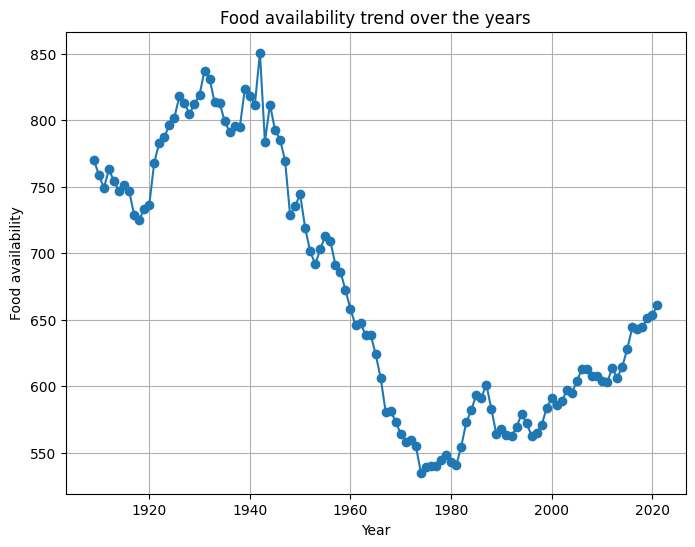

In [ ]:
# Line plot of Total shell
plt.figure(figsize=(8, 6))
plt.plot(dairy_df['Year'], dairy_df['Food availability'], marker='o')
plt.title('Food availability trend over the years')
plt.xlabel('Year')
plt.ylabel('Food availability')
plt.grid(True)
plt.show()

**The boxplot below shows the distribution of the `Food availability` column. We can see below that the inter-quartile range for this column lies in between 580 to 760, while there are no apparent outliers observed from the boxplot.**

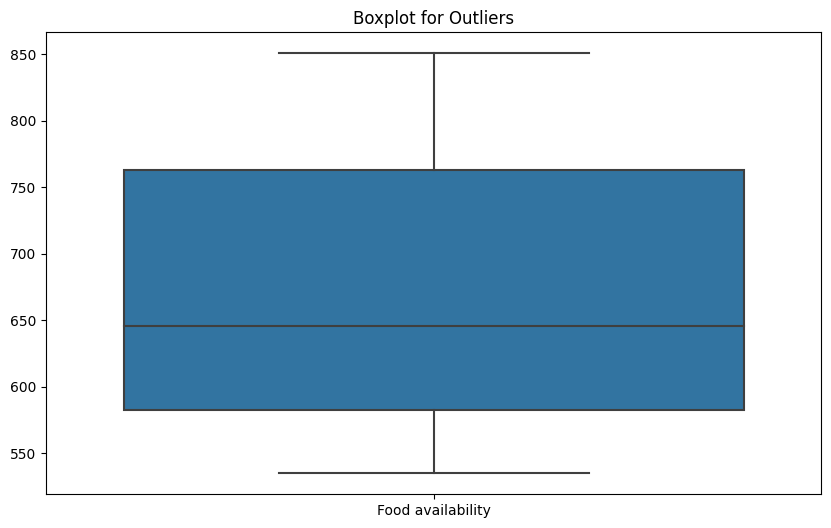

In [ ]:
# Outliers and Data Integrity
plt.figure(figsize=(10, 6))
sns.boxplot(data=dairy_df[['Food availability']])
plt.title('Boxplot for Outliers')
plt.show()

## 3. MODEL TRAINING AND PREDICTIONS

The code below first instantiates a linear regression model and then fits the dataset onto it.

It then also instantiates a random forest model with 200 estimators and specifed the maximum depth of the trees to be 10. It then fits the random forests model onto the dataset.

We then create a dataframe for predicting the future years (2022, 2023, 2024, and 2025)

After that, we make predictions for the 'Food availability' for the future years using Random Forests and Linear regression models we trained previously.

We then calculate the R2-score for random forest and linear regression model by passing actual dataset and model predicted values.



In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Separate features (X) and target variable (y)
X = dairy_df[['Year']]
y = dairy_df['Food availability']

# Fit Linear Regression model with parameters
linear_model = LinearRegression()
linear_model.fit(X, y)

# Fit Random Forest model with parameters
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X, y)

# Predict sugar consumption for the years 2022, 2023, 2024, and 2025
future_years = pd.DataFrame({'Year': [2022, 2023, 2024, 2025]})

linear_predictions = linear_model.predict(future_years)
rf_predictions = rf_model.predict(future_years)

# Calculate R-squared for both models
linear_r2 = r2_score(y, linear_model.predict(X))
rf_r2 = r2_score(y, rf_model.predict(X))

print("Linear Regression R-squared:", linear_r2)
print("Random Forest R-squared:", rf_r2)

Linear Regression R-squared: 0.6039631709056895
Random Forest R-squared: 0.9980807444944301


The code cell below plots 2 graphs. One graph shows the actual values of the dataset for the 'Food availability' column, and shows how well the linear regression model fitted itself onto those values.

The second graph shows the actual values of the dataset for the 'Food availability' column, and shows how well the random forests model fitted itself onto those values.

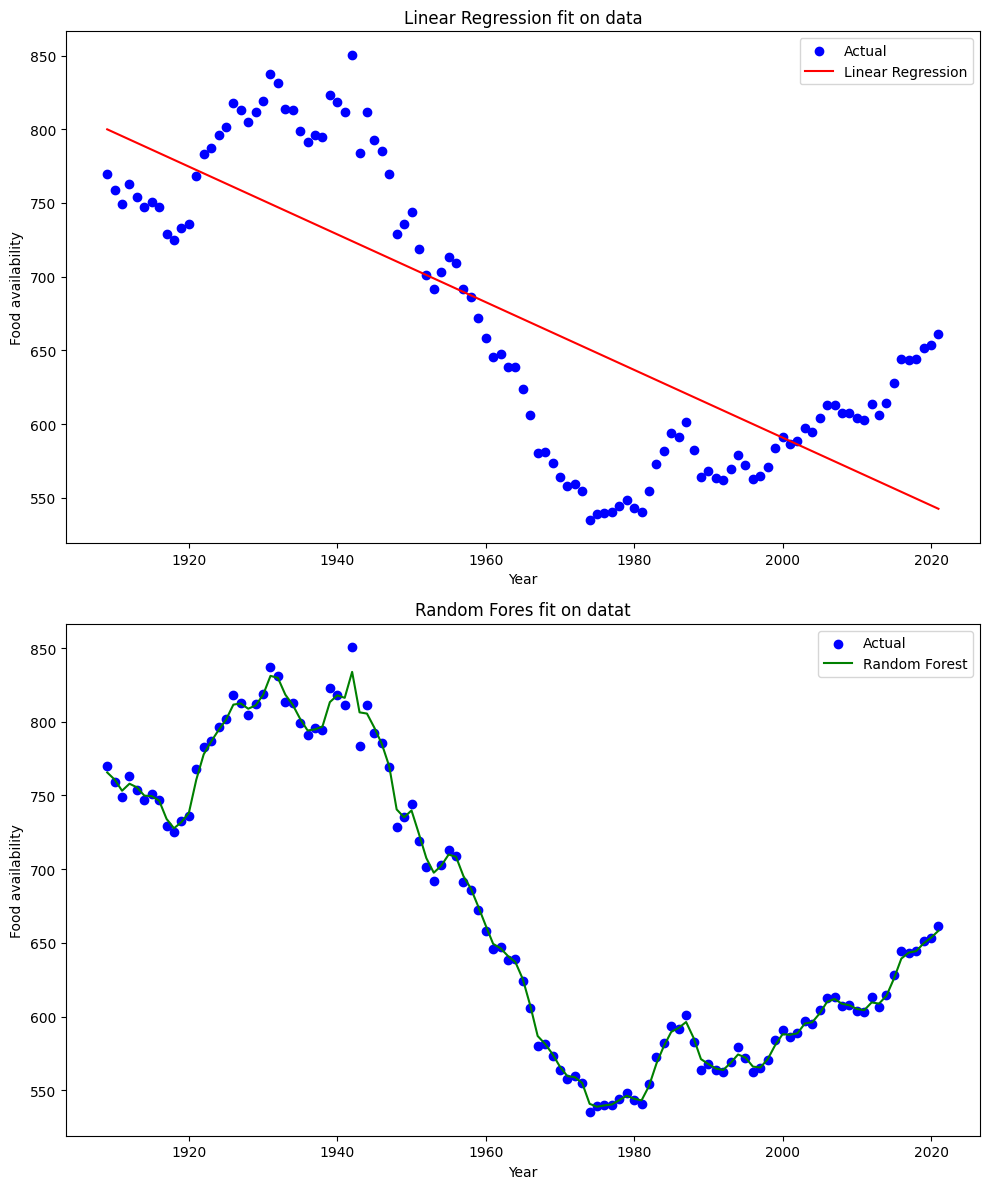

In [ ]:
# Plotting the regression graphs
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, linear_model.predict(X), color='red', label='Linear Regression')
plt.title('Linear Regression fit on data')
plt.xlabel('Year')
plt.ylabel('Food availability')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, rf_model.predict(X), color='green', label='Random Forest')
plt.title('Random Fores fit on datat')
plt.xlabel('Year')
plt.ylabel('Food availability')
plt.legend()

plt.tight_layout()
plt.show()

We can see from above charts, that Random Forest model was better able to fit on the dataset, and thus make accurate predictions as compared to linear regression

The code cell below creates a dataframe containing the predictions by both models from year 2022 to 2025.

In [ ]:
# Display the predictions_df DataFrame
predictions_df = pd.DataFrame({
    'Year': future_years['Year'],
    'Linear Regression Prediction': linear_predictions,
    'Random Forest Prediction': rf_predictions
})

predictions_df

,Year,Linear Regression Prediction,Random Forest Prediction
0,2022,540.265712,658.235422
1,2023,537.967510,658.235422
2,2024,535.669309,658.235422
3,2025,533.371107,658.235422


# WORKING ON EGGS EXCEL SHEET

## 1. INITIAL ANALYSIS

In [ ]:
eggs_df.head()

,Year,"U.S. population (Millions), July 11",Total shell (millions),Per capita shell (millions)
0,1909,90.490,NaN,NaN
1,1910,92.407,NaN,NaN
2,1911,93.863,NaN,NaN
3,1912,95.335,NaN,NaN
4,1913,97.225,NaN,NaN


In [ ]:
eggs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 113 non-null    int64  
 1   U.S. population (Millions), July 11  113 non-null    float64
 2   Total shell (millions)               56 non-null     float64
 3   Per capita shell (millions)          56 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.7 KB


In [ ]:
eggs_df.describe()

,Year,"U.S. population (Millions), July 11",Total shell (millions),Per capita shell (millions)
count,113.00000,113.000000,56.000000,56.000000
mean,1965.00000,198.612296,53866.032412,208.535885
std,32.76431,74.380637,5685.899484,36.034727
min,1909.00000,90.490000,45927.518412,169.959595
25%,1937.00000,128.961000,51052.578000,178.468692
50%,1965.00000,194.303000,52989.680898,196.474815
75%,1993.00000,260.255000,56239.404000,233.237787
max,2021.00000,332.140523,69613.528152,287.209630


In [ ]:
eggs_df.shape

(113, 4)

In [ ]:
eggs_df.isnull().sum()

Year                                    0
U.S. population (Millions), July 11     0
Total shell (millions)                 57
Per capita shell (millions)            57
dtype: int64

## FILLING IN MISSING VALUES

In [ ]:
eggs_df.isnull().sum()

Year                                   0
U.S. population (Millions), July 11    0
Total shell (millions)                 0
Per capita shell (millions)            0
dtype: int64

**As we can see, that in total shell and per capita shell, we have alot of missing values, almost half of the size of the dataframe. So, it would not be wise to fill these values blindly, therefore, the only solution is to drop these values instead.**

In [ ]:
eggs_df.dropna(inplace=True)

## EXPLORATORY DATA ANALYSIS

In [ ]:
eggs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 57 to 112
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 56 non-null     int64  
 1   U.S. population (Millions), July 11  56 non-null     float64
 2   Total shell (millions)               56 non-null     float64
 3   Per capita shell (millions)          56 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.2 KB


**The lineplot shows the total shell consumption in the USA over the years. We can see that grew drastically after the 2000, peaking at 2020, and then falling down.**

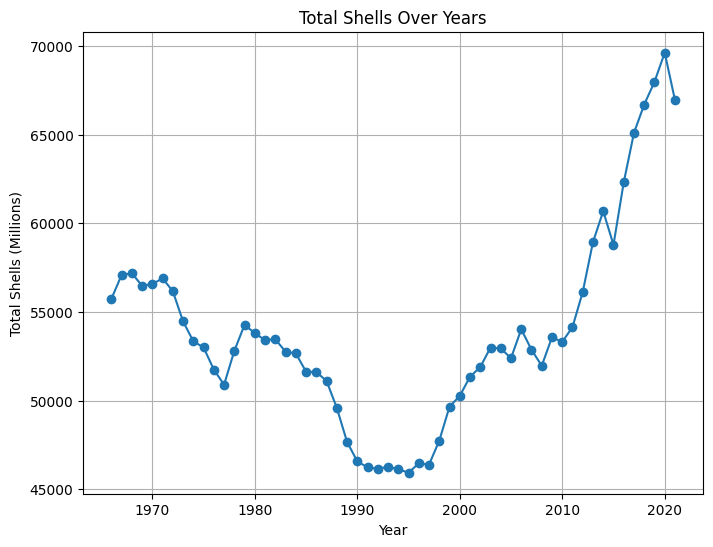

In [ ]:
# Line plot of Total shell
plt.figure(figsize=(8, 6))
plt.plot(eggs_df['Year'], eggs_df['Total shell (millions)'], marker='o')
plt.title('Total Shells Over Years')
plt.xlabel('Year')
plt.ylabel('Total Shells (Millions)')
plt.grid(True)
plt.show()

**The graph belows show a regression plot between the total shells and per capita shells. We can see that the regression line is unable to fit between the two columns, indicating less positive correlation betweeen them.**

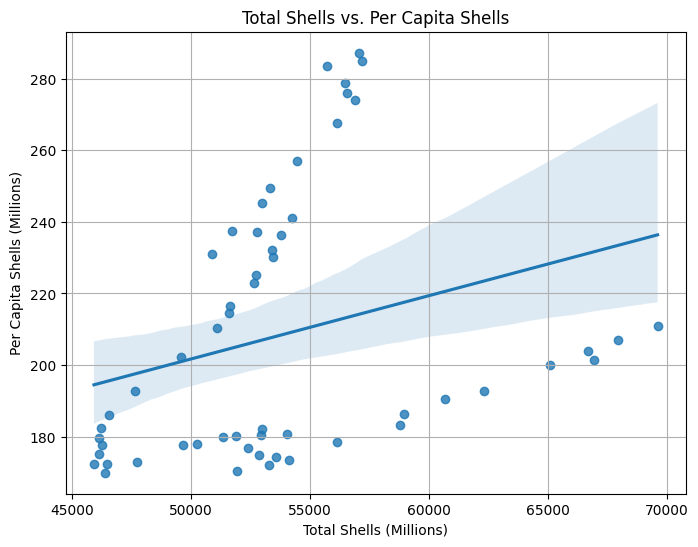

In [ ]:
# Scatter plot of Total shell vs. Per capita shell
plt.figure(figsize=(8, 6))
sns.regplot(x='Total shell (millions)', y='Per capita shell (millions)', data=eggs_df)
plt.title('Total Shells vs. Per Capita Shells')
plt.xlabel('Total Shells (Millions)')
plt.ylabel('Per Capita Shells (Millions)')
plt.grid(True)
plt.show()

**The graph below visualizes a heatmap showing the correlation values between all columns of the dataframe. Higher shades of red indicate a strong postivie correlation while lower shades indicates lesser correlation.**

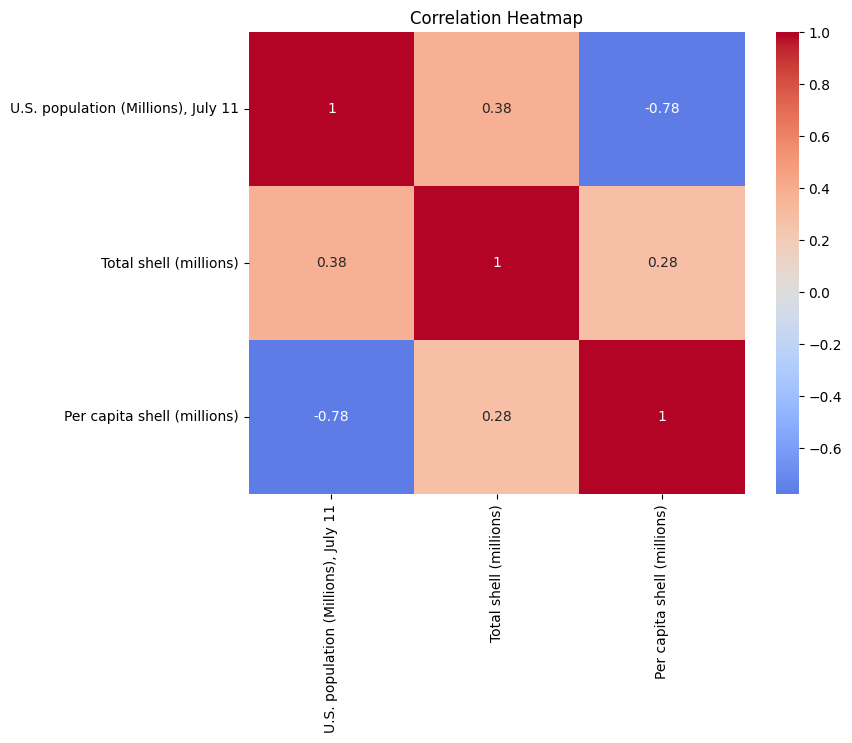

In [ ]:
# Correlation heatmap
correlation_matrix = eggs_df.drop(columns='Year').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## . MODEL BUILDING AND PREDICTIONS

The code below first instantiates a linear regression model and then fits the dataset onto it.

It then also instantiates a random forest model with 200 estimators and specifed the maximum depth of the trees to be 10. It then fits the random forests model onto the dataset.

We then create a dataframe for predicting the future years (2022, 2023, 2024, and 2025)

After that, we make predictions for 'Total shell (millions)', 'Per capita shell (millions)' columns; for the future years using Random Forests and Linear regression models we trained previously. We then append those predictions for each column into the dataframe.

We then calculate the R2-score for random forest and linear regression model by passing actual dataset and model predicted values.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Separate features (X) and target variables (y)
X = eggs_df[['Year']]
y = eggs_df[['Total shell (millions)', 'Per capita shell (millions)']]

# Fit Linear Regression model and calculate R-squared
linear_model = LinearRegression()
linear_model.fit(X, y)

# Fit Random Forest model and calculate R-squared
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X, y)

# Predict future values for the years 2022, 2023, 2024, and 2025
future_years = pd.DataFrame({'Year': [2022, 2023, 2024, 2025]})

linear_predictions = linear_model.predict(future_years)
rf_predictions = rf_model.predict(future_years)

# Append the predictions to the future_years DataFrame
for i, col in enumerate(y.columns):
    future_years[f'Linear Regression Prediction ({col})'] = linear_predictions[:, i]
    future_years[f'Random Forest Prediction ({col})'] = rf_predictions[:, i]

linear_r2 = r2_score(y, linear_model.predict(X))
rf_r2 = r2_score(y, rf_model.predict(X))

print("Linear Regression R-squared:", linear_r2)
print("Random Forest R-squared:", rf_r2)


Linear Regression R-squared: 0.37852769456173596
Random Forest R-squared: 0.9972840741250859


The code below creates 2 graphs, one graph for each column. The first graph shows the actual values for the 'Total shell (millions)' column, and then shows how well both the random forest and linear regression models fitted onto the actual values.

The second graph then shows the actual values for the 'Per capita shell (millions)' column, and then shows how well both the random forest and linear regression models fitted onto the actual values.

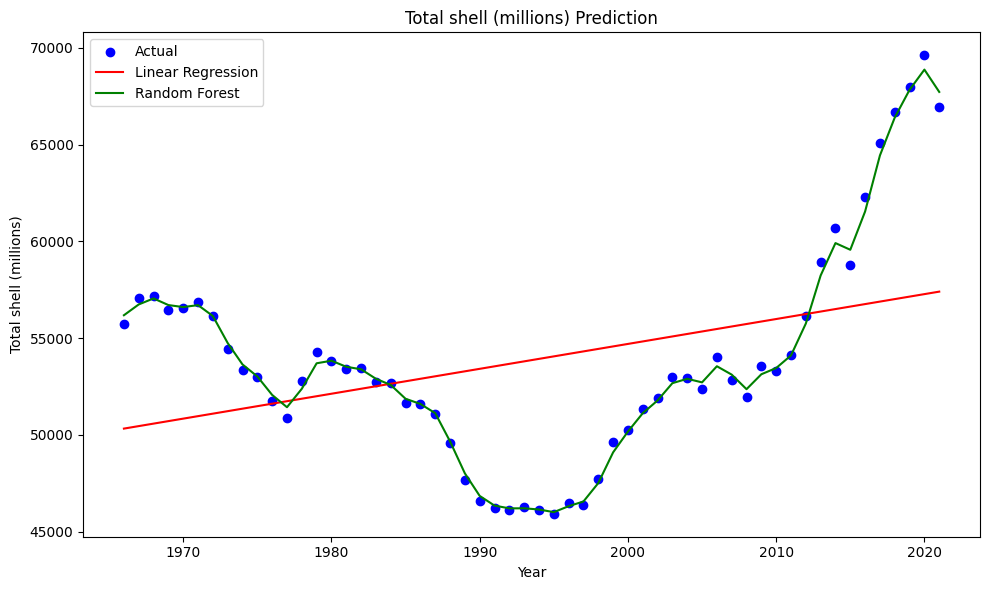

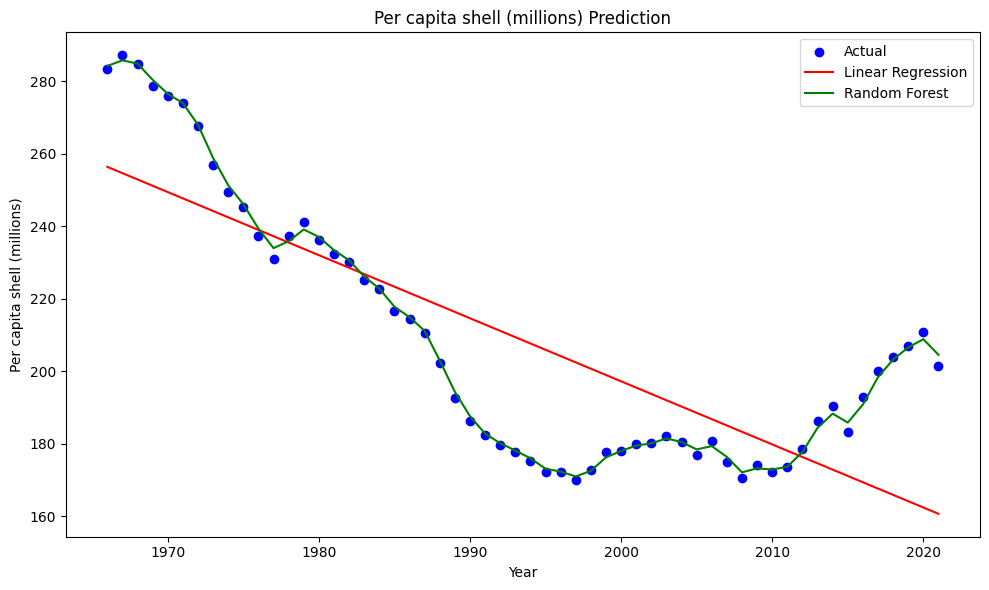

In [ ]:

# Create two graphs, one for each column
for i, col in enumerate(y.columns):
    plt.figure(figsize=(10, 6))

    plt.scatter(X, y[col], color='blue', label='Actual')
    plt.plot(X, linear_model.predict(X)[:, i], color='red', label='Linear Regression')
    plt.plot(X, rf_model.predict(X)[:, i], color='green', label='Random Forest')
    plt.title(f'{col} Prediction')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.legend()

    plt.tight_layout()
    plt.show()


Let view the predictions by both the models

In [ ]:
future_years

,Year,Linear Regression Prediction (Total shell (millions)),Random Forest Prediction (Total shell (millions)),Linear Regression Prediction (Per capita shell (millions)),Random Forest Prediction (Per capita shell (millions))
0,2022,57532.116483,67719.658827,158.917788,204.53762
1,2023,57660.751012,67719.658827,157.176803,204.53762
2,2024,57789.385541,67719.658827,155.435817,204.53762
3,2025,57918.020070,67719.658827,153.694831,204.53762


# WORKING ON SUGAR EXCEL SHEET

## 1. INITIAL ANALYSIS

In [ ]:
sugar_df.tail()

,Year,"U.S. population in millions, July 11","Caloric sweeteners (in pounds, dry weighted)"
51,2017,325.206030,129.749572
52,2018,326.923976,127.794045
53,2019,328.475998,126.489209
54,2020,330.113980,126.714414
55,2021,332.140523,127.326800


In [ ]:
sugar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          56 non-null     int64  
 1   U.S. population in millions, July 11          56 non-null     float64
 2   Caloric sweeteners (in pounds, dry weighted)  56 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.4 KB


The statistical summary provided for the "sugar_df" dataset contains key information about three variables: "Year," "U.S. population in millions, July 11," and "Caloric sweeteners (in pounds, dry weighted)."

1. Year: The dataset covers a 56-year period, ranging from 1966 to 2021. The years are evenly spaced, with a mean year of 1993.5, indicating a balanced representation of data over time.

2. U.S. Population in Millions, July 11: This variable represents the U.S. population in millions as of July 11 for each year in the dataset. The population shows a steady increase over the years, with a mean of approximately 263.92 million. The standard deviation of about 42.57 million suggests some variability in population figures around this mean.

3. Caloric Sweeteners (in Pounds, Dry Weighted): This variable quantifies the consumption of caloric sweeteners in pounds on a dry-weighted basis. The mean consumption is approximately 130.54 pounds, with a standard deviation of about 10.98 pounds. The values range from a minimum of 112.93 pounds to a maximum of 153.59 pounds, indicating some variation in sweetener consumption over the years.

In [ ]:
sugar_df.describe()

,Year,"U.S. population in millions, July 11","Caloric sweeteners (in pounds, dry weighted)"
count,56.000000,56.000000,56.000000
mean,1993.500000,263.922151,130.542195
std,16.309506,42.572408,10.981067
min,1966.000000,196.560000,112.932805
25%,1979.750000,227.058250,121.483972
50%,1993.500000,261.845500,130.003106
75%,2007.250000,302.702378,137.442887
max,2021.000000,332.140523,153.587106


In [ ]:
sugar_df.shape

(56, 3)

In [ ]:
sugar_df.isnull().sum()

Year                                            0
U.S. population in millions, July 11            0
Caloric sweeteners (in pounds, dry weighted)    0
dtype: int64

## 2. EXPLORATORY DATA ANALYSIS

In [ ]:
sugar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          56 non-null     int64  
 1   U.S. population in millions, July 11          56 non-null     float64
 2   Caloric sweeteners (in pounds, dry weighted)  56 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.4 KB


**The graph below shows the per capita trend of caloric sweeteners (in pounds) consumption over the years.**

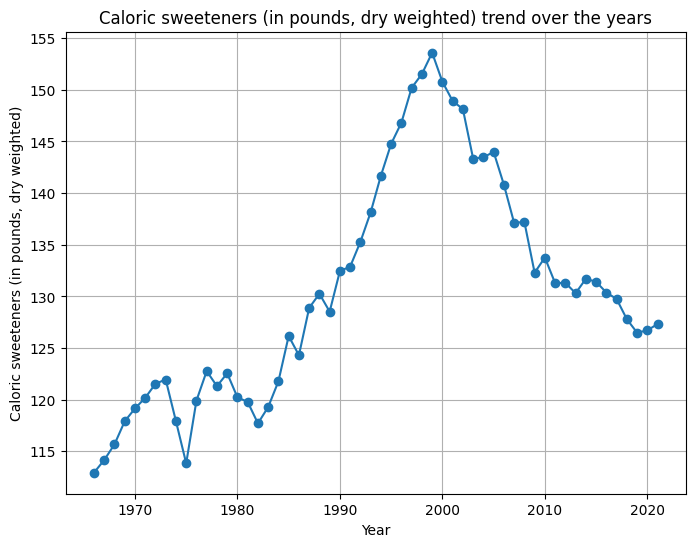

In [ ]:
# Line plot of Total shell
plt.figure(figsize=(8, 6))
plt.plot(sugar_df['Year'], sugar_df['Caloric sweeteners (in pounds, dry weighted)'], marker='o')
plt.title('Caloric sweeteners (in pounds, dry weighted) trend over the years')
plt.xlabel('Year')
plt.ylabel('Caloric sweeteners (in pounds, dry weighted)')
plt.grid(True)
plt.show()

**The boxplot below shows the distribution of the `caloric sweetners` column. We can see below that the inter-quartile range for this column lies in between 120 to 140, while there are no apparent outliers observed from the boxplot.**

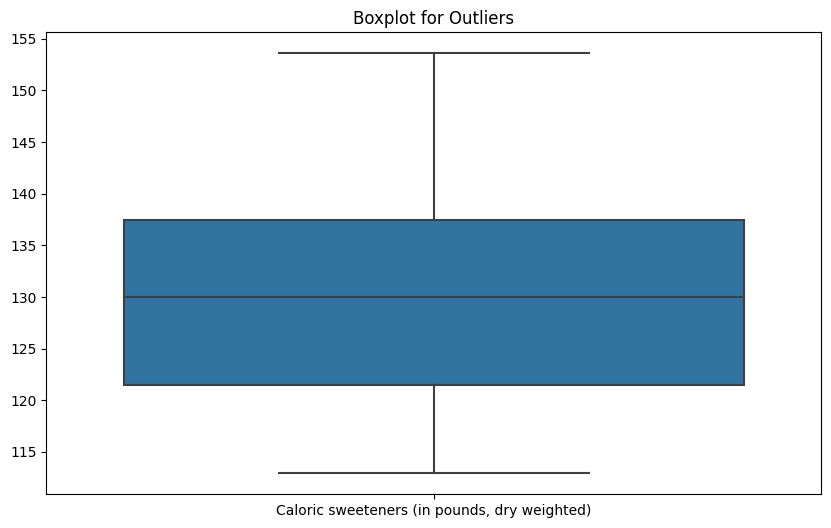

In [ ]:
# Outliers and Data Integrity
plt.figure(figsize=(10, 6))
sns.boxplot(data=sugar_df[['Caloric sweeteners (in pounds, dry weighted)']])
plt.title('Boxplot for Outliers')
plt.show()

## 3. MODEL TRAINING AND PREDICTIONS

The code below first instantiates a linear regression model and then fits the dataset onto it.

It then also instantiates a random forest model with 200 estimators and specifed the maximum depth of the trees to be 10. It then fits the random forests model onto the dataset.

We then create a dataframe for predicting the future years (2022, 2023, 2024, and 2025)

After that, we make predictions for the caloric sweetners for the future years using Random Forests and Linear regression models we trained previously.

We then calculate the R2-score for random forest and linear regression model by passing actual dataset and model predicted values.



In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Separate features (X) and target variable (y)
X = sugar_df[['Year']]
y = sugar_df['Caloric sweeteners (in pounds, dry weighted)']

# Fit Linear Regression model with parameters
linear_model = LinearRegression()
linear_model.fit(X, y)

# Fit Random Forest model with parameters
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X, y)

# Predict sugar consumption for the years 2022, 2023, 2024, and 2025
future_years = pd.DataFrame({'Year': [2022, 2023, 2024, 2025]})

linear_predictions = linear_model.predict(future_years)
rf_predictions = rf_model.predict(future_years)

# Calculate R-squared for both models
linear_r2 = r2_score(y, linear_model.predict(X))
rf_r2 = r2_score(y, rf_model.predict(X))

print("Linear Regression R-squared:", linear_r2)
print("Random Forest R-squared:", rf_r2)

Linear Regression R-squared: 0.3203360078407669
Random Forest R-squared: 0.9958918148264004


The code cell below plots 2 graphs. One graph shows the actual values of the dataset for the caloric sweetner column, and shows how well the linear regression model fitted itself onto those values.

The second graph shows the actual values of the dataset for the caloric sweetner column, and shows how well the random forests model fitted itself onto those values.

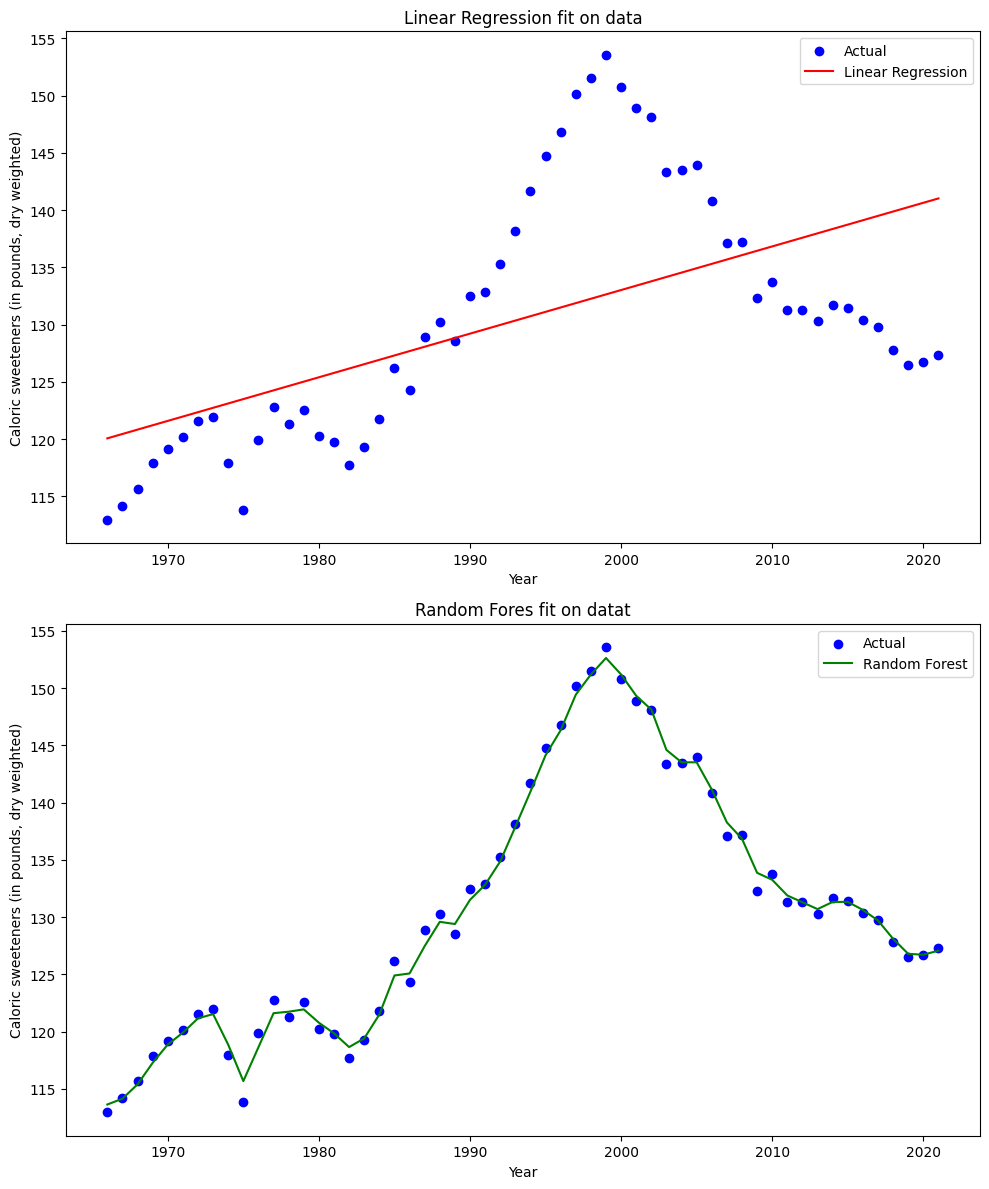

In [ ]:
# Plotting the regression graphs
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, linear_model.predict(X), color='red', label='Linear Regression')
plt.title('Linear Regression fit on data')
plt.xlabel('Year')
plt.ylabel('Caloric sweeteners (in pounds, dry weighted)')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, rf_model.predict(X), color='green', label='Random Forest')
plt.title('Random Fores fit on datat')
plt.xlabel('Year')
plt.ylabel('Caloric sweeteners (in pounds, dry weighted)')
plt.legend()

plt.tight_layout()
plt.show()

We can see from above charts, that Random Forest model was better able to fit on the dataset, and thus make accurate predictions as compared to linear regression

The code cell below creates a dataframe containing the predictions by both models from year 2022 to 2025.

In [ ]:
# Display the predictions_df DataFrame
predictions_df = pd.DataFrame({
    'Year': future_years['Year'],
    'Linear Regression Prediction': linear_predictions,
    'Random Forest Prediction': rf_predictions
})

predictions_df

,Year,Linear Regression Prediction,Random Forest Prediction
0,2022,141.402736,127.071425
1,2023,141.783807,127.071425
2,2024,142.164879,127.071425
3,2025,142.545950,127.071425


# WORKING ON MEAT EXCEL SHEET

## 1. INITIAL ANALYSIS

In [ ]:
meat_df

In [ ]:
meat_df.info()


The statistical summary provided for the "meat_df" dataset contains valuable insights into several variables, including "Year," "U.S. population in Millions, July 12," "Red meat in pounds," "Poultry in pounds," and "Fish and shellfish in pounds." Here's an explanation of each variable:

1. Year: The dataset spans 113 years, from 1909 to 2021. The years are evenly distributed across this time frame, with a mean year of 1965. This suggests a comprehensive historical record of data.

2. U.S. Population in Millions, July 12: This variable represents the U.S. population in millions as of July 12 for each year in the dataset. The mean population is approximately 198.61 million, with a notable standard deviation of 74.38 million. This wide variation indicates significant changes and fluctuations in the population over the years.

3. Red Meat in Pounds: This variable quantifies the consumption of red meat in pounds. The mean consumption is approximately 157.72 pounds, with a relatively small standard deviation of 18.61 pounds. The values range from a minimum of 117.26 pounds to a maximum of 198.38 pounds, suggesting a moderate level of variation in red meat consumption.

4. Poultry in Pounds: This variable represents the consumption of poultry in pounds. The mean poultry consumption is approximately 54.47 pounds, with a standard deviation of 39.15 pounds. The values range from a minimum of 14.89 pounds to a maximum of 128.45 pounds, indicating a relatively wide range of poultry consumption.

5. Fish and Shellfish in Pounds: This variable quantifies the consumption of fish and shellfish in pounds. The mean consumption is approximately 12.87 pounds, with a standard deviation of 2.88 pounds. The values range from a minimum of 7.97 pounds to a maximum of 19.12 pounds, showing relatively low variation in fish and shellfish consumption.

In [ ]:
meat_df.describe()

In [ ]:
meat_df.shape

In [ ]:
meat_df.isnull().sum()

## 2. FILLING MISSING VALUES

In [ ]:
mean_fish_shellfish = meat_df['Fish and shellfish in pounds'].mean()
meat_df['Fish and shellfish in pounds'].fillna(mean_fish_shellfish, inplace=True)

## 3. EXPLORATORY DATA ANALYSIS

In [ ]:
meat_df.info()

**The lineplot below shows the trends of all the columns in the dataset over the years. We can see that poultry consumption has significantly increased over the years, while fish and shellfish consumption remained constant.**

In [ ]:
# Line plots to visualize trends over the years
plt.figure(figsize=(12, 6))
plt.plot(meat_df['Year'], meat_df['U.S. population in Millions, July 12'], label='U.S. Population', marker='o', markersize=2.5)
plt.plot(meat_df['Year'], meat_df['Red meat in pounds'], label='Red Meat' , marker='o', markersize=2.5)
plt.plot(meat_df['Year'], meat_df['Poultry in pounds'], label='Poultry' , marker='o', markersize=2.5)
plt.plot(meat_df['Year'], meat_df['Fish and shellfish in pounds'], label='Fish and Shellfish', marker='o', markersize=2.5)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends Over Time')
plt.legend()
plt.show()

**The correlation heatmap shows the correlation values between each columns of the dataframe. High positive correlation is showed by dark red values, while low correlation is represented by light blue values.**

In [ ]:
# Heatmap to visualize correlations
correlation_matrix = meat_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**The boxplot below shows the distribution of red meat, poultry, and fish and shellfish consumption in pounds. We can see that the IQR for poultry is much spread out as compared to other categories, indicating it higher consumtion, while fish and shellfish consumption has a very low IQR range.**

In [ ]:
# Boxplots to visualize distribution of meat consumption
plt.figure(figsize=(10, 6))
sns.boxplot(data=meat_df[['Red meat in pounds', 'Poultry in pounds', 'Fish and shellfish in pounds']])
plt.title('Boxplot of Meat Consumption')
plt.ylabel('Pounds')
plt.show()

## 4. MODEL TRAINING AND FUTURE PREDICTIONS

The code below first instantiates a linear regression model and then fits the dataset onto it.

It then also instantiates a random forest model with 200 estimators and specifed the maximum depth of the trees to be 10. It then fits the random forests model onto the dataset.

We then create a dataframe for predicting the future years (2022, 2023, 2024, and 2025)

After that, we make predictions for 'Red meat in pounds', 'Poultry in pounds', 'Fish and shellfish in pounds' columns; for the future years using Random Forests and Linear regression models we trained previously. We then append those predictions for each column into the dataframe.

We then calculate the R2-score for random forest and linear regression model by passing actual dataset and model predicted values.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Separate features (X) and target variables (y)
X = meat_df[['Year']]
y = meat_df[['Red meat in pounds', 'Poultry in pounds', 'Fish and shellfish in pounds']]

# Fit Linear Regression model and calculate R-squared
linear_model = LinearRegression()
linear_model.fit(X, y)

# Fit Random Forest model and calculate R-squared
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X, y)

# Predict future values for the years 2022, 2023, 2024, and 2025
future_years = pd.DataFrame({'Year': [2022, 2023, 2024, 2025]})

linear_predictions = linear_model.predict(future_years)
rf_predictions = rf_model.predict(future_years)

# Append the predictions to the future_years DataFrame
for i, col in enumerate(y.columns):
    future_years[f'Linear Regression Prediction ({col})'] = linear_predictions[:, i]
    future_years[f'Random Forest Prediction ({col})'] = rf_predictions[:, i]

linear_r2 = r2_score(y, linear_model.predict(X))
rf_r2 = r2_score(y, rf_model.predict(X))

print("Linear Regression R-squared:", linear_r2)
print("Random Forest R-squared:", rf_r2)


The code below creates 3 graphs, one graph for each column. The first graph shows the actual values for the 'Red meat' column, and then shows how well both the random forest and linear regression models fitted onto the actual values.

The second model then shows the actual values for the 'Poultry' column, and then shows how well both the random forest and linear regression models fitted onto the actual values.

The third model then shows the actual values for the 'Fish and shellfish' column, and then shows how well both the random forest and linear regression models fitted onto the actual values.

In [ ]:
# Create three graphs, one for each column
for i, col in enumerate(y.columns):
    plt.figure(figsize=(10, 6))

    plt.scatter(X, y[col], color='blue', label='Actual')
    plt.plot(X, linear_model.predict(X)[:, i], color='red', label='Linear Regression')
    plt.plot(X, rf_model.predict(X)[:, i], color='green', label='Random Forest')
    # plt.plot(future_years, linear_predictions[:, i], color='red', linestyle='dashed', label='Linear Regression Prediction')
    # plt.plot(future_years, rf_predictions[:, i], color='green', linestyle='dashed', label='Random Forest Prediction')
    plt.title(f'{col} Prediction')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.legend()

    plt.tight_layout()
    plt.show()

Again we can see from above charts, that Random Forest model was better able to fit on the dataset, and thus make accurate predictions as compared to linear regression on all columns of the dataframe. That is also why, Random Forest has a higher R-squared value as compared to linear regression

Now let's see the future_years dataframe we created above. It contains the predictions for both models, on all three features of the dataset

In [ ]:
future_years

# WORKING ON GRAINS EXCEL SHEET

## 1. INITIAL ANALYSIS

In [ ]:
grains_df.head(3)

,Year,Wheat flour in pounds,Rye flour in pounds,Rice in pounds,Corn products in pounds,Oat products in pounds,Barley products in pounds,Total flour and cereal products in pounds,"US population in millions, july 12"
0,1967,112.974964,1.223449,7.862407,13.1,4.806409,1.238743,141.205971,198.712
1,1968,112.751003,1.300448,8.292198,12.4,4.756566,1.256166,140.756381,200.706
2,1969,112.450182,1.199048,6.766219,12.2,4.817605,1.288977,138.722031,202.677


In [ ]:
grains_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       55 non-null     int64  
 1   Wheat flour in pounds                      55 non-null     float64
 2   Rye flour in pounds                        55 non-null     float64
 3   Rice in pounds                             44 non-null     float64
 4   Corn products in pounds                    55 non-null     float64
 5   Oat products in pounds                     55 non-null     float64
 6   Barley products in pounds                  54 non-null     float64
 7   Total flour and cereal products in pounds  55 non-null     float64
 8   US population in millions, july 12         55 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 4.0 KB


Let's look at a summary of statistical information for the "grains_df" dataset:

1. Year: The dataset spans 55 years from 1967 to 2021.

2. Wheat Flour Consumption: The average consumption of wheat flour is approximately 128.78 pounds per year. The consumption ranges from a minimum of 109.83 pounds to a maximum of 146.77 pounds.

3. Rye Flour Consumption: On average, rye flour consumption is around 0.67 pounds per year.

4. Rice Consumption: The average rice consumption is approximately 13.92 pounds per year, with values ranging from a minimum of 5.66 pounds to a maximum of 20.48 pounds.

5. Corn Products Consumption: On average, corn products consumption is approximately 23.46 pounds per year, with a range from 9.70 to 36.80 pounds.

6. Oat Products Consumption: Oat products are consumed at an average of about 4.76 pounds per year.

7. Barley Products Consumption: Barley products have an average consumption of approximately 0.83 pounds per year.

8. Total Flour and Cereal Products Consumption: The average consumption of total flour and cereal products is around 169.62 pounds per year. This consumption varies from a minimum of 133.16 pounds to a maximum of 199.46 pounds.

9. U.S. Population (July 12): The dataset includes U.S. population figures ranging from approximately 198.71 million to 332.14 million over the years.

In [ ]:
grains_df.describe()

,Year,Wheat flour in pounds,Rye flour in pounds,Rice in pounds,Corn products in pounds,Oat products in pounds,Barley products in pounds,Total flour and cereal products in pounds,"US population in millions, july 12"
count,55.00000,55.000000,55.000000,44.000000,55.000000,55.000000,54.000000,55.000000,55.000000
mean,1994.00000,128.782728,0.671015,13.915900,23.457797,4.759788,0.831012,169.619950,265.146918
std,16.02082,11.177369,0.245444,5.129737,9.189875,0.705891,0.162770,22.170367,41.957294
min,1967.00000,109.832130,0.485958,5.662071,9.700000,3.762347,0.624021,133.155463,198.712000
25%,1980.50000,116.851294,0.488730,8.586634,13.200000,4.435407,0.698706,146.258915,228.846000
50%,1994.00000,132.065213,0.593634,15.265812,24.010819,4.695317,0.767358,173.797542,263.436000
75%,2007.50000,136.208754,0.692663,18.926936,32.700000,4.767977,0.950791,191.020139,303.400839
max,2021.00000,146.769563,1.300448,20.477384,36.800000,6.568693,1.288977,199.464770,332.140523


In [ ]:
grains_df.shape

(55, 9)

In [ ]:
grains_df.isnull().sum()

Year                                          0
Wheat flour in pounds                         0
Rye flour in pounds                           0
Rice in pounds                               11
Corn products in pounds                       0
Oat products in pounds                        0
Barley products in pounds                     1
Total flour and cereal products in pounds     0
US population in millions, july 12            0
dtype: int64

## 2. FILLING MISSING VALUES

In [ ]:
# Calculate the mean for each column
column_means = grains_df.mean()

# Fill missing values with column means
grains_df = grains_df.fillna(column_means)

## 3. EXPLORATORY DATA ANALYSIS

In [ ]:
grains_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       55 non-null     int64  
 1   Wheat flour in pounds                      55 non-null     float64
 2   Rye flour in pounds                        55 non-null     float64
 3   Rice in pounds                             55 non-null     float64
 4   Corn products in pounds                    55 non-null     float64
 5   Oat products in pounds                     55 non-null     float64
 6   Barley products in pounds                  55 non-null     float64
 7   Total flour and cereal products in pounds  55 non-null     float64
 8   US population in millions, july 12         55 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 4.0 KB


**The lineplot below shows the grain consumption for different kinds of grains over the years. We can see that the total flour and cereal products had the highest consumption over the years, peaking in the 2000, and then declining a little, but still has higher consumption rate as compared to all other categories throughout the years. On the other hand, barley products had the least consumtions and they remained constant throughout the years.**

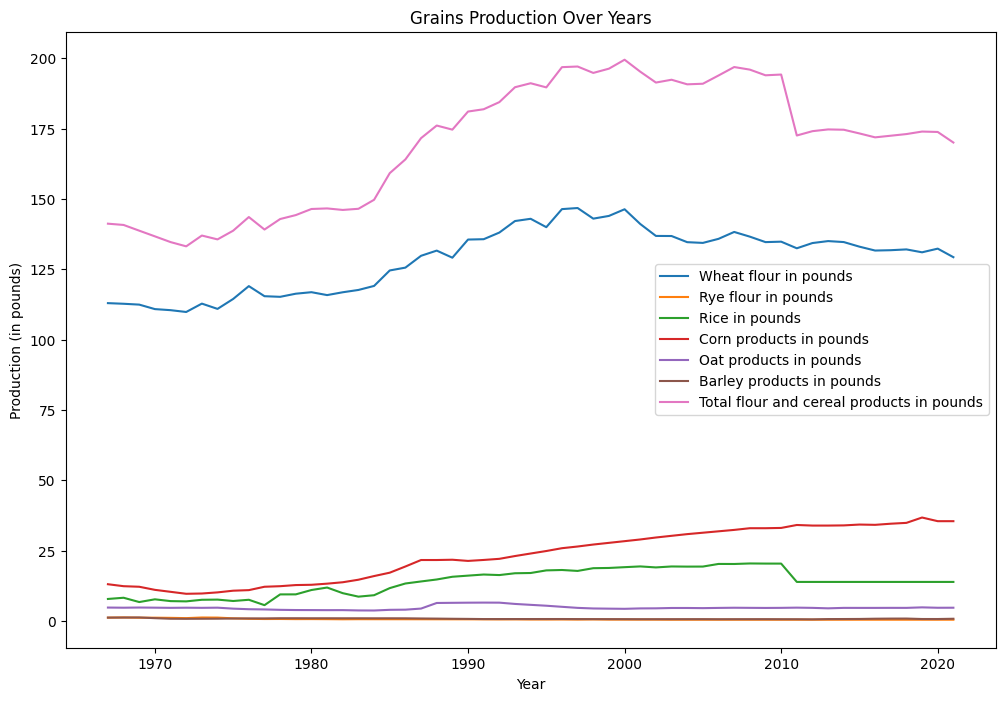

In [ ]:
# Line plot for each grain over the years
grain_columns = grains_df.columns[1:8]  # Exclude 'Year' and 'US population' columns
plt.figure(figsize=(12, 8))
for col in grain_columns:
    plt.plot(grains_df['Year'], grains_df[col], label=col)
plt.title('Grains Production Over Years')
plt.xlabel('Year')
plt.ylabel('Production (in pounds)')
plt.legend()
plt.show()

**The code below creates a correlation plot between each column of the dataframe. Higher positive correlation is indicated by dark red values, while lower correlation is indicated by light blue values. Negative correlation is indicated by dark blue color. Columns having high correlation means that if one column increases, the other column also increases. While columns having high negative correlation represents an inversely proportional relationship, where one increases if the other decreases.**

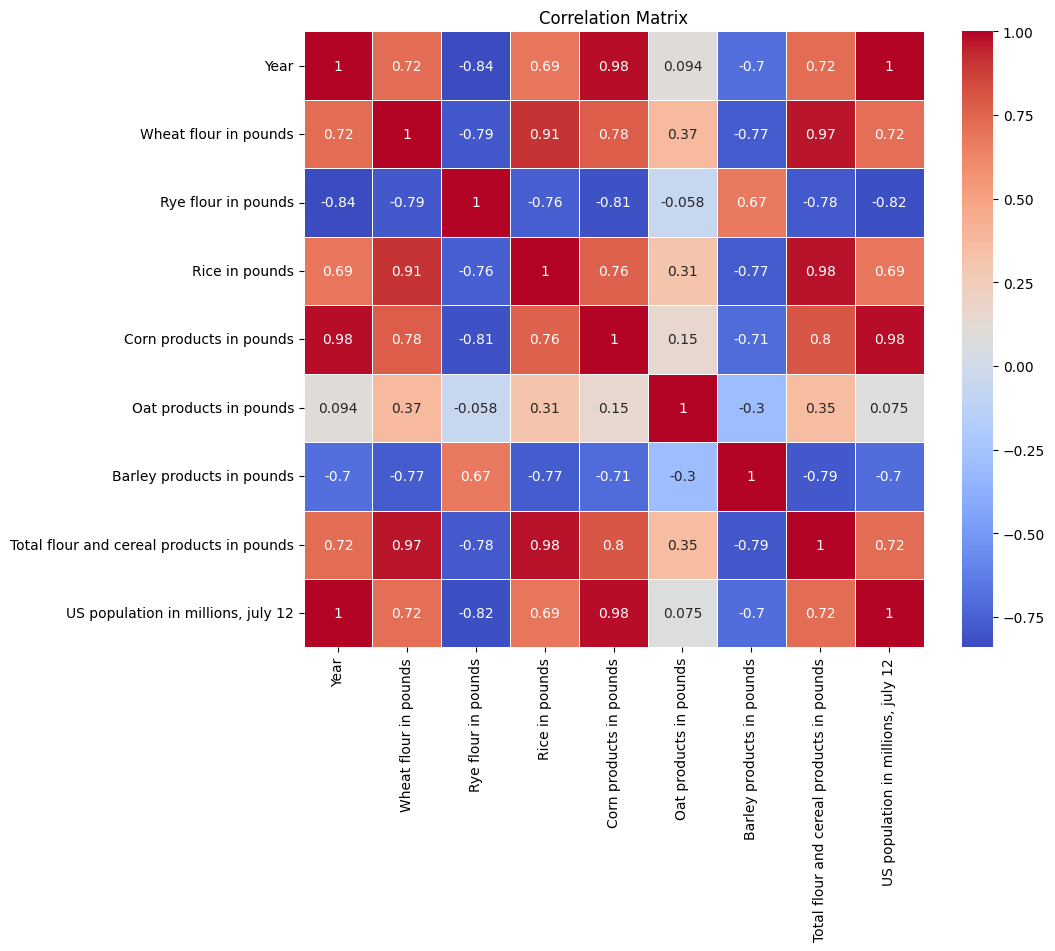

In [ ]:
# Correlation matrix
correlation_matrix = grains_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 4. MODEL TRAINING AND FUTURE PREDICTIONS

The code below first splits the dataset into X and y variables.

It then initializes some variables and creates a dataframe for future years (2022 - 2025).

It then loops through each column in the `y` dataset and performs the following steps:

1. Creates a linear regression model and fits it onto the column. Also calculates the R2 score for that column and appends it to the `linear_r2_scores` column.
2. Creates a random forests model and fits it onto the column. Also calculates the R2 score for that column and appends it to the `rf_r2_scores` column.
3. Make future predictions from 2022 to 2025 using both linear regresssion and random forests.
4. Creates a graph showing the spread of data points in 2-dimensions, and then fit the linear regression and random forests lines onto the data points.

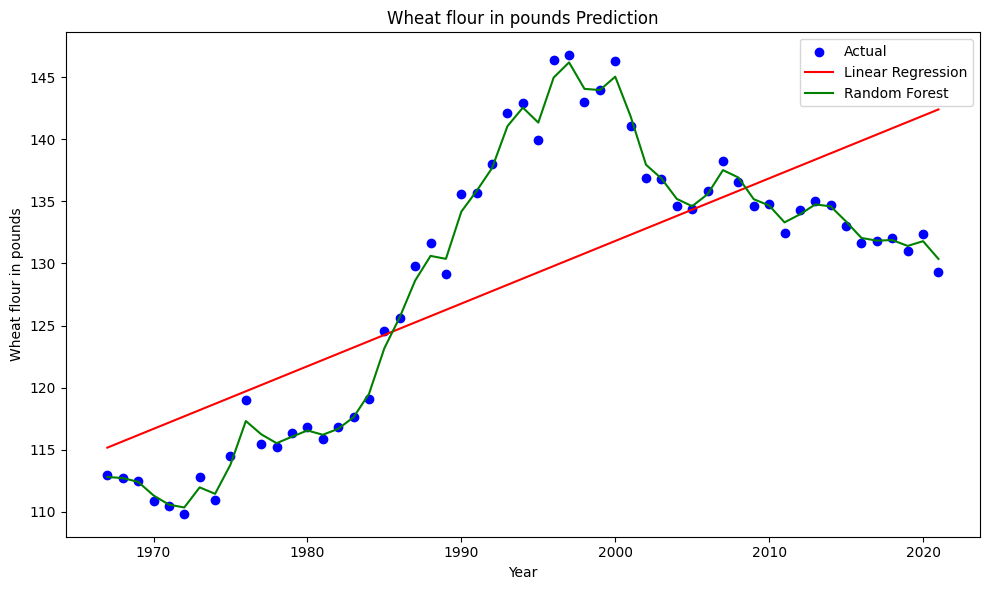

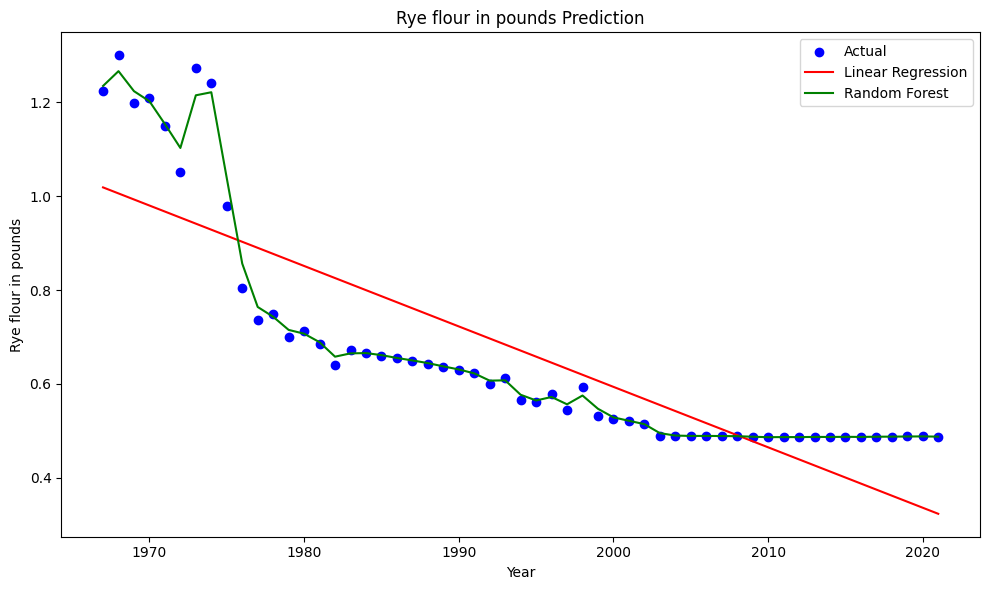

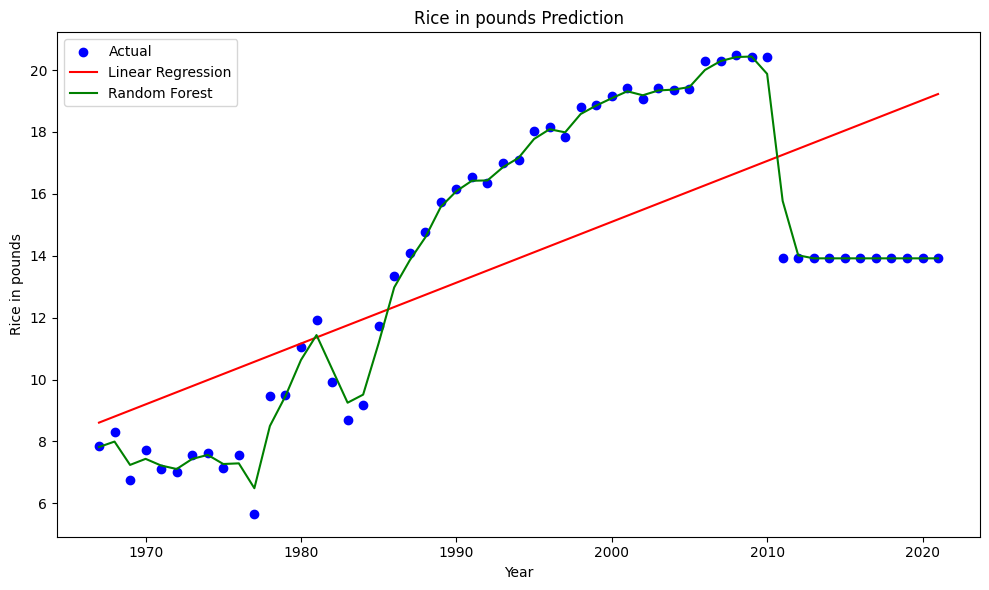

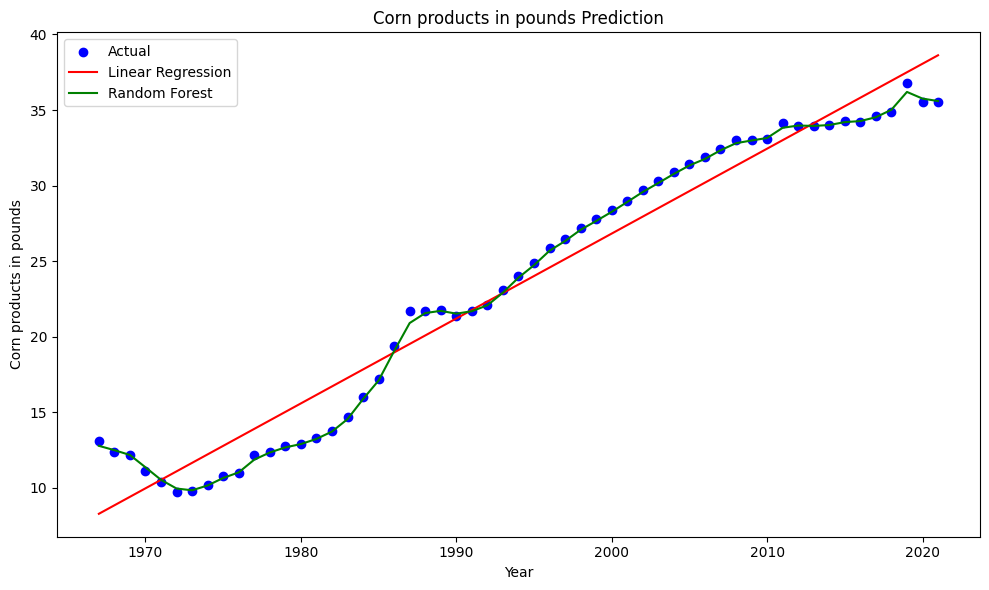

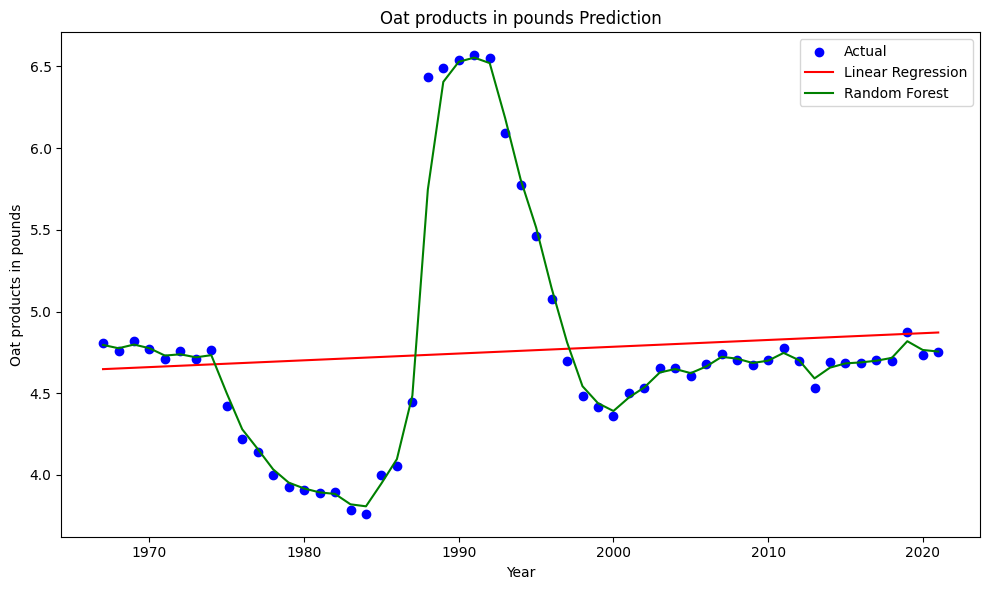

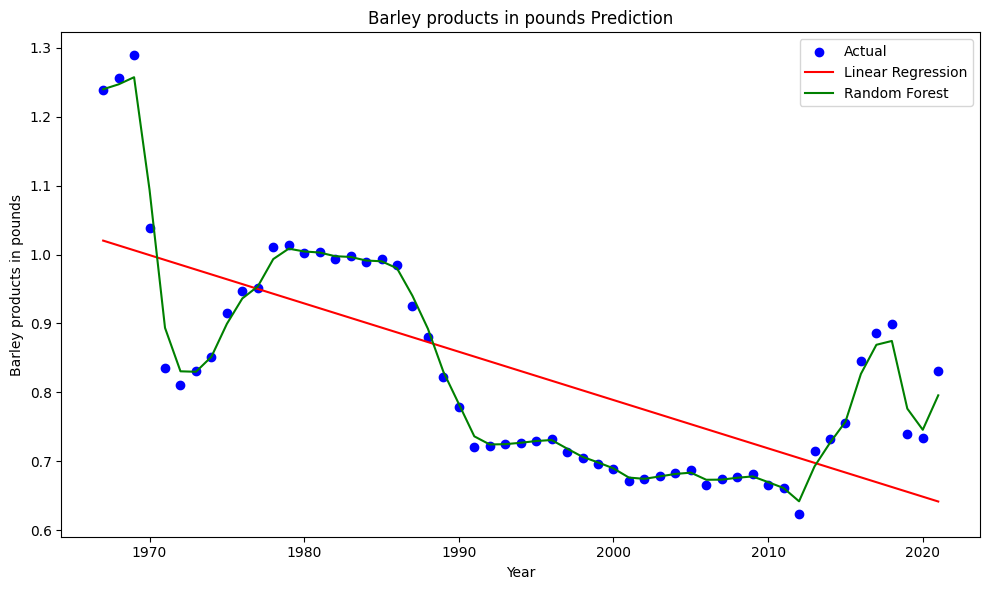

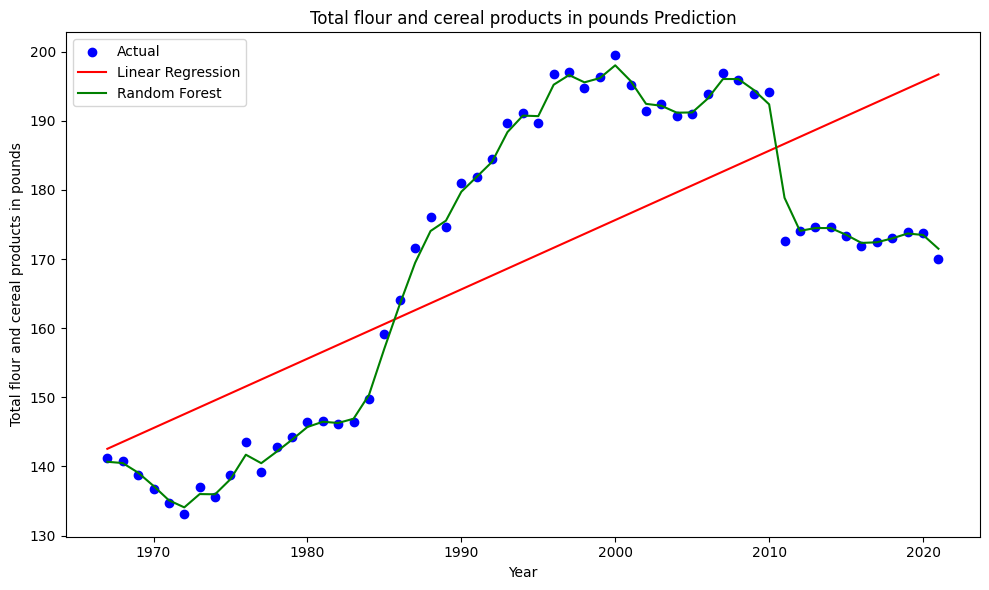

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Separate features (X) and target variables (y)
X = grains_df[['Year']]
y = grains_df[['Wheat flour in pounds', 'Rye flour in pounds',
               'Rice in pounds', 'Corn products in pounds',
               'Oat products in pounds', 'Barley products in pounds',
               'Total flour and cereal products in pounds']]

# Create future_years DataFrame for prediction
future_years = pd.DataFrame({'Year': [2022, 2023, 2024, 2025]})

# Initialize dictionaries to store models, predictions, and R-squared scores
linear_models = {}
rf_models = {}
linear_predictions = {}
rf_predictions = {}
linear_r2_scores = {}
rf_r2_scores = {}

# Loop through each column for LR and RF model creation and predictions
for col in y.columns:
    # Fit Linear Regression model
    linear_model = LinearRegression()
    linear_model.fit(X, y[col])
    linear_models[col] = linear_model
    linear_r2_scores[col] = r2_score(y[col], linear_model.predict(X))


    # Fit Random Forest model
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
    rf_model.fit(X, y[col])
    rf_models[col] = rf_model
    rf_r2_scores[col] = r2_score(y[col], rf_model.predict(X))

    # Create future predictions
    linear_predictions[col] = linear_model.predict(future_years)
    rf_predictions[col] = rf_model.predict(future_years)

    # Plotting the predicted values
    plt.figure(figsize=(10, 6))

    plt.scatter(X, y[col], color='blue', label='Actual')
    plt.plot(X, linear_model.predict(X), color='red', label='Linear Regression')
    plt.plot(X, rf_model.predict(X), color='green', label='Random Forest')
    plt.title(f'{col} Prediction')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.legend()

    plt.tight_layout()
    plt.show()

The code below simply creates two dataframes, one containing predictions made by linear regression on all columns from 2022 to 2025, and one containing predictions made by random forests on all columns from 2022 to 2025.

In [ ]:
# Create DataFrames for LR and RF predictions
lr_predictions_df = pd.DataFrame(index=future_years['Year'])
rf_predictions_df = pd.DataFrame(index=future_years['Year'])

# Append the LR and RF predictions to their respective DataFrames
for col in y.columns:
    lr_predictions_df[f'Linear Regression Prediction ({col})'] = linear_predictions[col]
    rf_predictions_df[f'Random Forest Prediction ({col})'] = rf_predictions[col]



In [ ]:
# Display the LR predictions DataFrame by linear regression on all columns
print("Linear Regression Predictions:")
lr_predictions_df


Linear Regression Predictions:


,Linear Regression Prediction (Wheat flour in pounds),Linear Regression Prediction (Rye flour in pounds),Linear Regression Prediction (Rice in pounds),Linear Regression Prediction (Corn products in pounds),Linear Regression Prediction (Oat products in pounds),Linear Regression Prediction (Barley products in pounds),Linear Regression Prediction (Total flour and cereal products in pounds)
Year,,,,,,,
2022,142.908715,0.310292,19.420853,39.186526,4.876029,0.634836,197.690305
2023,143.413214,0.297409,19.617459,39.748266,4.880180,0.627830,198.692817
2024,143.917714,0.284526,19.814064,40.310006,4.884332,0.620823,199.695330
2025,144.422213,0.271643,20.010670,40.871747,4.888483,0.613817,200.697843


In [ ]:
# Display the RF predictions DataFrame by Random Forests on all columns
print("Random Forest Predictions:")
rf_predictions_df

Random Forest Predictions:


,Random Forest Prediction (Wheat flour in pounds),Random Forest Prediction (Rye flour in pounds),Random Forest Prediction (Rice in pounds),Random Forest Prediction (Corn products in pounds),Random Forest Prediction (Oat products in pounds),Random Forest Prediction (Barley products in pounds),Random Forest Prediction (Total flour and cereal products in pounds)
Year,,,,,,,
2022,130.362147,0.487601,13.9159,35.595,4.755328,0.795811,171.484815
2023,130.362147,0.487601,13.9159,35.595,4.755328,0.795811,171.484815
2024,130.362147,0.487601,13.9159,35.595,4.755328,0.795811,171.484815
2025,130.362147,0.487601,13.9159,35.595,4.755328,0.795811,171.484815


Let's view the R2 score on each column of the dataframe for both linear regression and random forests.

In [ ]:

# Create DataFrames to display R-squared scores
linear_r2_df = pd.DataFrame(linear_r2_scores.items(), columns=['Column', 'Linear Regression R-squared'])
rf_r2_df = pd.DataFrame(rf_r2_scores.items(), columns=['Column', 'Random Forest R-squared'])

# Display R-squared scores for linear regression on all columns
print("Linear Regression R-squared scores:")
linear_r2_df


Linear Regression R-squared scores:


,Column,Linear Regression R-squared
0,Wheat flour in pounds,0.522892
1,Rye flour in pounds,0.707123
2,Rice in pounds,0.473474
3,Corn products in pounds,0.959006
4,Oat products in pounds,0.008878
5,Barley products in pounds,0.484522
6,Total flour and cereal products in pounds,0.524812


In [ ]:
# Display R-squared scores for random forests on all columns
print("\nRandom Forest R-squared scores:")
print(rf_r2_df)


Random Forest R-squared scores:
                                      Column  Random Forest R-squared
0                      Wheat flour in pounds                 0.995772
1                        Rye flour in pounds                 0.994738
2                             Rice in pounds                 0.993066
3                    Corn products in pounds                 0.999530
4                     Oat products in pounds                 0.979270
5                  Barley products in pounds                 0.989752
6  Total flour and cereal products in pounds                 0.996833


Again we can see from above charts and dataframes, that Random Forest model was better able to fit on the dataset, and thus make accurate predictions as compared to linear regression on all columns of the dataframe. That is also why, Random Forest has a higher R-squared value as compared to linear regression

# WORKING ON FRUITS AND VEGETABLES EXCEL SHEET

## 1. INITIAL ANALYSIS

In [ ]:
fruits_df.head(3)

,Year,Fruit in pounds,Vegetables in pounds,Total fruit and vegetables in pounds,"U.S. population in millions, July 12"
0,1970,238.001109,336.264935,574.266044,205.052
1,1971,242.400164,339.546036,581.946199,207.661
2,1972,232.047569,337.765290,569.812860,209.896


In [ ]:
fruits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  50 non-null     int64  
 1   Fruit in pounds                       50 non-null     float64
 2   Vegetables in pounds                  50 non-null     float64
 3   Total fruit and vegetables in pounds  50 non-null     float64
 4   U.S. population in millions, July 12  50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


Statistical information on the dataset:

1. Year: The dataset spans 50 years from 1970 to 2019.

2. Fruit Consumption: On average, fruit consumption is approximately 264.27 pounds per year. The consumption ranges from a minimum of 232.05 pounds to a maximum of 299.97 pounds.

3. Vegetable Consumption: The average vegetable consumption is approximately 382.86 pounds per year. Consumption varies from a minimum of 334.32 pounds to a maximum of 425.18 pounds.

4. Total Fruit and Vegetable Consumption: The average total consumption of fruits and vegetables is around 647.12 pounds per year, with values ranging from a minimum of 569.81 pounds to a maximum of 721.28 pounds.

5. U.S. Population (July 12): The dataset includes U.S. population figures ranging from approximately 205.05 million to 328.48 million over the years.

In [ ]:
fruits_df.describe()

,Year,Fruit in pounds,Vegetables in pounds,Total fruit and vegetables in pounds,"U.S. population in millions, July 12"
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,1994.50000,264.268600,382.855814,647.124414,266.374619
std,14.57738,16.363412,32.392232,43.505917,38.811275
min,1970.00000,232.047569,334.318219,569.812860,205.052000
25%,1982.25000,252.937451,346.413145,616.033800,232.717750
50%,1994.50000,266.657799,390.980081,647.501614,264.996500
75%,2006.75000,276.663750,412.345610,683.222294,301.251894
max,2019.00000,299.971873,425.182660,721.284576,328.475998


In [ ]:
fruits_df.shape

(50, 5)

In [ ]:
fruits_df.isnull().sum()

Year                                    0
Fruit in pounds                         0
Vegetables in pounds                    0
Total fruit and vegetables in pounds    0
U.S. population in millions, July 12    0
dtype: int64

## 2. EXPLORATORY DATA ANALYSIS

In [ ]:
fruits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  50 non-null     int64  
 1   Fruit in pounds                       50 non-null     float64
 2   Vegetables in pounds                  50 non-null     float64
 3   Total fruit and vegetables in pounds  50 non-null     float64
 4   U.S. population in millions, July 12  50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


**The graph below shows the trend of fruits, vegetables, and total fuits and vegetable consumtion over the years. We can see that vegetable consumption was greater as compared to food consumption over the years.**

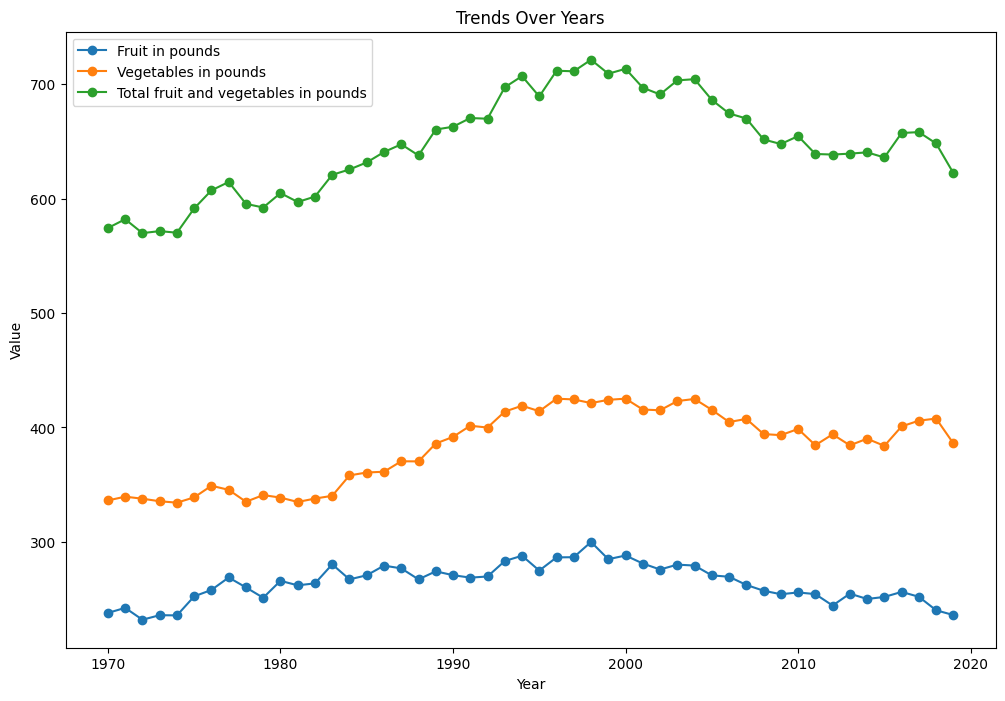

In [ ]:
# Line plots for each column
plt.figure(figsize=(12, 8))
for col in fruits_df.columns[1:4]:
    plt.plot(fruits_df['Year'], fruits_df[col], marker='o', label=col)
plt.title("Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()

**The correlation heatmap shows the relationship between all columns of the dataframe. Higher positive correlation si represented by dark red colors, while lower correlation is represented by lighter shades of red.**

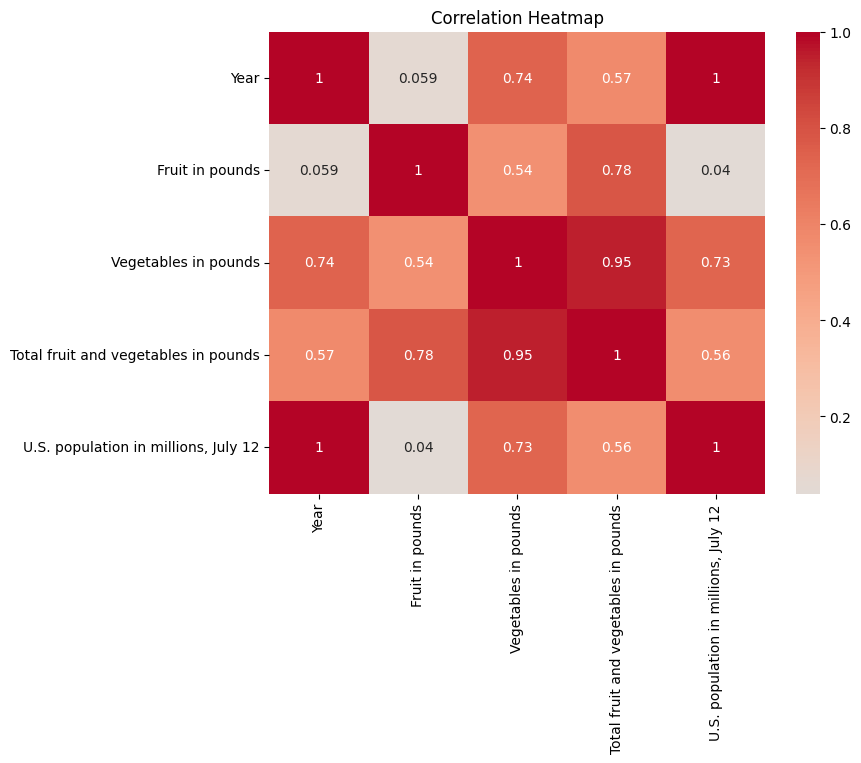

In [ ]:
# Correlation heatmap
corr_matrix = fruits_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

## 3. MODEL TRAINING AND FUTURE PREDICTIONS

In [ ]:
fruits_df.columns

Index(['Year', 'Fruit in pounds', 'Vegetables in pounds',
       'Total fruit and vegetables in pounds',
       'U.S. population in millions, July 12'],
      dtype='object')

The code below first creates the 'X' abd 'y' features for the dataset. It then scales the 'y' features using standard scaler.

After that we instantiate a linear regression model and then fit the dataset onto it.

It then also instantiates a random forest model with 200 estimators and specifed the maximum depth of the trees to be 10. It then fits the random forests model onto the dataset.

We then create a dataframe for predicting the future years (2022, 2023, 2024, and 2025)

After that, we make predictions for Fruit in pounds', 'Vegetables in pounds', 'Total fruit and vegetables in pounds' columns; for the future years using Random Forests and Linear regression models we trained previously. We then append those predictions for each column into the dataframe.

We then scale up the predictions made by the models using 'inverse_transform' method. This is because the model makes predictions in ranges of 0 to 1, so we need to scale them up back to their original values.

We then calculate the R2-score for random forest and linear regression model by passing actual dataset and model predicted values.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate features (X) and target variables (y)
X = fruits_df[['Year']]
y = fruits_df[['Fruit in pounds', 'Vegetables in pounds', 'Total fruit and vegetables in pounds']]

# Apply data transformation using StandardScaler only on target variables (y)
scaler_y = StandardScaler()

y_scaled = scaler_y.fit_transform(y)

# Fit Linear Regression model and calculate R-squared
linear_model = LinearRegression()
linear_model.fit(X, y_scaled)

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X, y_scaled)

# Predict future values for the years 2022, 2023, 2024, and 2025
future_years = pd.DataFrame({'Year': [2022, 2023, 2024, 2025]})

# Calculate predictions for Linear Regression and Random Forest
linear_predictions_scaled = linear_model.predict(future_years)
rf_predictions_scaled = rf_model.predict(future_years)

# Inverse transform predictions to get them in original units
linear_predictions = scaler_y.inverse_transform(linear_predictions_scaled)
rf_predictions = scaler_y.inverse_transform(rf_predictions_scaled)

# Append the predictions to the future_years DataFrame
for i, col in enumerate(y.columns):
    future_years[f'Linear Regression Prediction ({col})'] = linear_predictions[:, i]
    future_years[f'Random Forest Prediction ({col})'] = rf_predictions[:, i]

# Calculate R-squared
linear_r2 = r2_score(y_scaled, linear_model.predict(X))
rf_r2 = r2_score(y_scaled, rf_model.predict(X))

print("Linear Regression R-squared:", linear_r2)
print("Random Forest R-squared:", rf_r2)

Linear Regression R-squared: 0.2913382265954186
Random Forest R-squared: 0.9879587560525027


The code below creates 3 graphs, one graph for each column. The first graph shows the actual values for the 'Fruit in pounds' column, and then shows how well both the random forest and linear regression models fitted onto the actual values.

The second model then shows the actual values for the 'Vegetables in pounds' column, and then shows how well both the random forest and linear regression models fitted onto the actual values.

The third model then shows the actual values for the 'Total fruit and vegetables in pounds' column, and then shows how well both the random forest and linear regression models fitted onto the actual values.

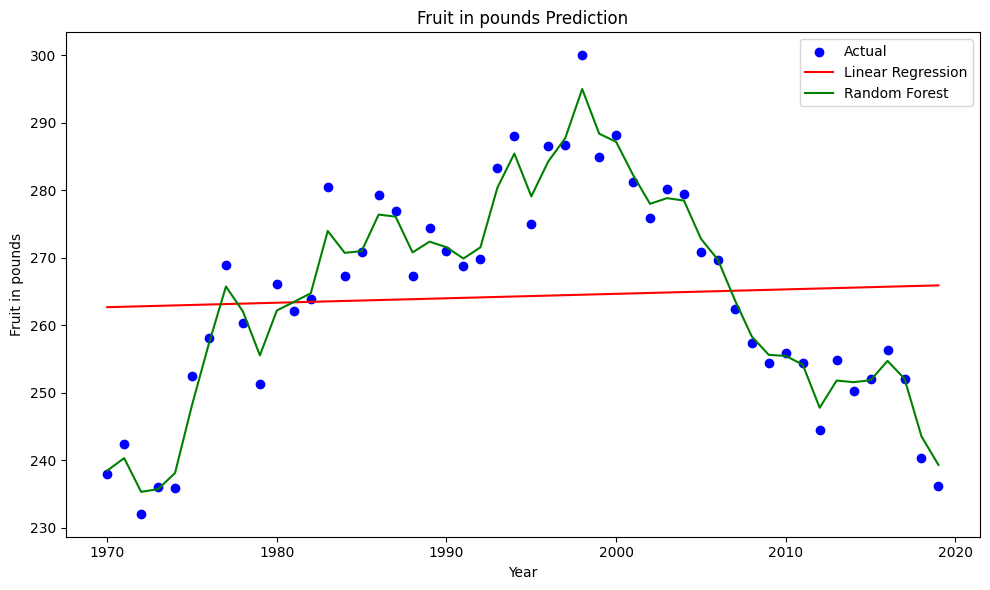

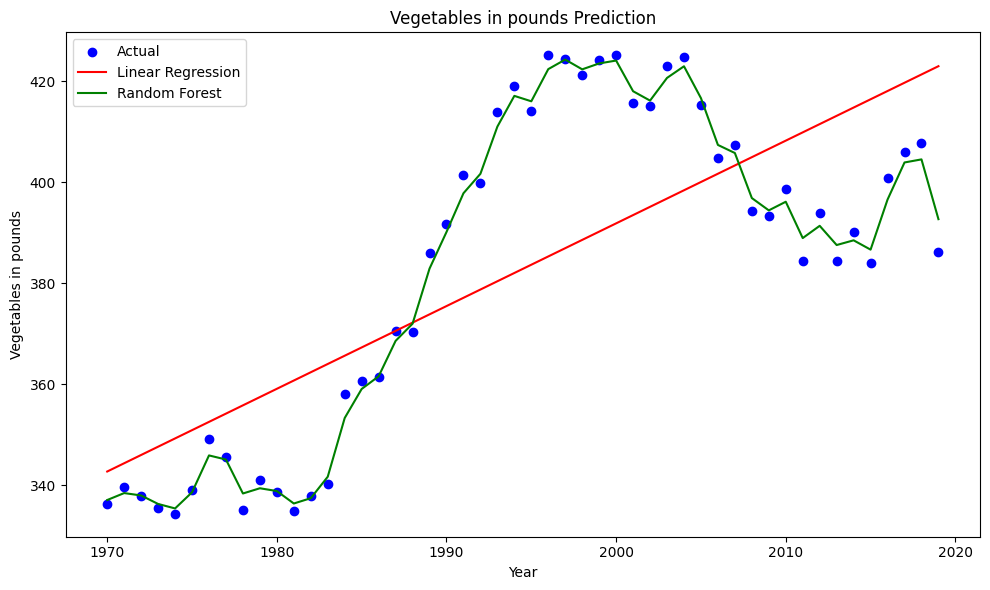

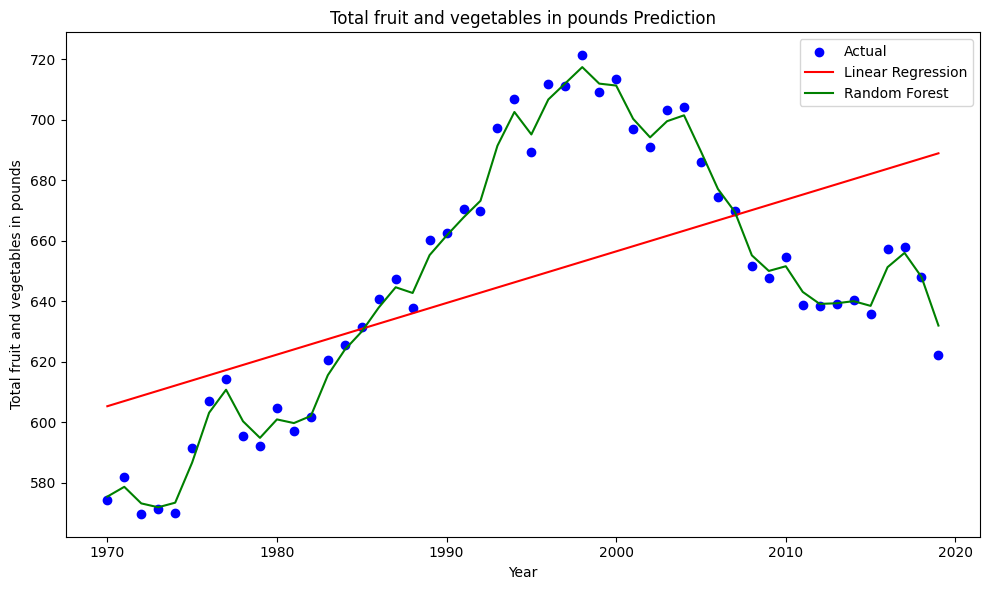

In [ ]:
# Create three graphs, one for each column
for i, col in enumerate(y.columns):
    plt.figure(figsize=(10, 6))

    plt.scatter(X, y[col], color='blue', label='Actual')
    plt.plot(X, scaler_y.inverse_transform(linear_model.predict(X))[:, i], color='red', label='Linear Regression')
    plt.plot(X, scaler_y.inverse_transform(rf_model.predict(X))[:, i], color='green', label='Random Forest')
    # plt.plot(future_years['Year'], linear_predictions[:, i], color='red', linestyle='dashed', label='Linear Regression Prediction')
    # plt.plot(future_years['Year'], rf_predictions[:, i], color='green', linestyle='dashed', label='Random Forest Prediction')
    plt.title(f'{col} Prediction')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
future_years

,Year,Linear Regression Prediction (Fruit in pounds),Random Forest Prediction (Fruit in pounds),Linear Regression Prediction (Vegetables in pounds),Random Forest Prediction (Vegetables in pounds),Linear Regression Prediction (Total fruit and vegetables in pounds),Random Forest Prediction (Total fruit and vegetables in pounds)
0,2022,266.081040,239.291064,427.933230,392.702357,694.014270,631.993422
1,2023,266.146947,239.291064,429.572409,392.702357,695.719356,631.993422
2,2024,266.212854,239.291064,431.211587,392.702357,697.424441,631.993422
3,2025,266.278761,239.291064,432.850766,392.702357,699.129527,631.993422


Again we can see from above charts and dataframes, that Random Forest model was better able to fit on the dataset, and thus make accurate predictions as compared to linear regression on all columns of the dataframe. That is also why, Random Forest has a higher R-squared value as compared to linear regression